In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import math

# First is the theoretical model results

In [2]:
#set the same initial length
x=0.27
A=0.005
r=0.0006

x1=0.055
x2=0.215
l1=sp.sqrt(A**2+x1**2)
l2=sp.sqrt(A**2+x2**2)

x11=0.055
x22=0.05
x33=0.165
l11=sp.sqrt(A**2+x11**2)
l22=sp.sqrt((2*A)**2+x22**2)
l33=sp.sqrt(A**2+x33**2)

x111=0.055
x222=0.05
x333=0.05
x444=0.115
l111=sp.sqrt(A**2+x111**2)
l222=sp.sqrt((2*A)**2+x222**2)
l333=sp.sqrt((2*A)**2+x333**2)
l444=sp.sqrt(A**2+x444**2)



Tmax=0.009
k=25

In [3]:
# no Disc TSA system
def delta_x0 (theta) :
    delta_x0=x-sp.sqrt(x**2-(r*theta*(math.pi))**2)
    return delta_x0


In [4]:
# one Disc TSA
def delta_x1 (theta_1) :
    delta_x1=x1-sp.sqrt(l1**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x1)

def delta_x2 (theta_2) :
    delta_x2=x2-sp.sqrt(l2**2-(A+r*theta_2*(math.pi))**2)
    return(delta_x2)

In [5]:
# two disc TSA
def delta_x11 (theta_1) :
    delta_x11=x11-sp.sqrt(l11**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x11)

def delta_x22 (theta_2) :
    delta_x22=x22-sp.sqrt(l22**2-(2*A+r*theta_2*(math.pi))**2)
    return(delta_x22)

def delta_x33 (theta_3) :
    delta_x33=x33-sp.sqrt(l33**2-(A+r*theta_3*(math.pi))**2)
    return(delta_x33)

In [6]:
#three disc TSA
def delta_x111 (theta_1) :
    delta_x111=x111-sp.sqrt(l111**2-(A+r*theta_1*(math.pi))**2)
    return(delta_x111)

def delta_x222 (theta_2) :
    delta_x222=x222-sp.sqrt(l222**2-(2*A+r*theta_2*(math.pi))**2)
    return(delta_x222)

def delta_x333 (theta_3) :
    delta_x333=x333-sp.sqrt(l333**2-(2*A+r*theta_3*(math.pi))**2)
    return(delta_x333)

def delta_x444 (theta_4) :
    delta_x444=x444-sp.sqrt(l444**2-(A+r*theta_4*(math.pi))**2)
    return(delta_x444)

In [7]:
theta=sp.symbols("theta",real=True)

delta_x_nodisc=delta_x0(theta)
delta_x_one_disc=delta_x1((l1/(l1+l2))*theta)+delta_x2((l2/(l1+l2))*theta)
delta_x_two_disc=delta_x11((l11/(l11+l22+l33))*theta)+delta_x22((l22/(l11+l22+l33))*theta)+delta_x33((l33/(l11+l22+l33))*theta)
delta_x_three_disc=delta_x111((l111/(l111+l222+l333+l444))*theta)+delta_x222((l222/(l111+l222+l333+l444))*theta)+delta_x333((l333/(l111+l222+l333+l444))*theta)+delta_x444((l444/(l111+l222+l333+l444))*theta)


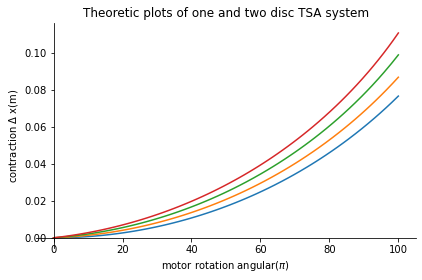

In [8]:
Line1,Line2,Line3,Line4=sp.plot(delta_x_nodisc,delta_x_one_disc,delta_x_two_disc,delta_x_three_disc,(theta,0,100),title='Theoretic plots of one and two disc TSA system',
       xlabel='motor rotation angular($\pi$)',ylabel='contraction $\Delta$ x(m)')
x_zero,y_zero=Line1.get_points()
x_one,y_one=Line2.get_points()
x_two,y_two=Line3.get_points()
x_three,y_three=Line4.get_points()

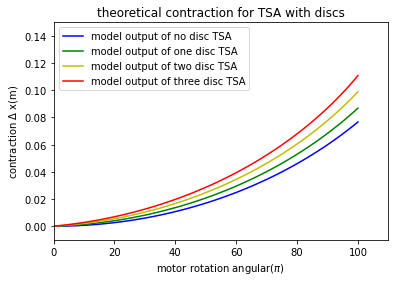

In [9]:
plt.plot(x_zero,y_zero,color='b',label='model output of no disc TSA')
plt.plot(x_one,y_one,color='g',label= 'model output of one disc TSA')
plt.plot(x_two,y_two,color='y',label='model output of two disc TSA')
plt.plot(x_three,y_three,color='r',label='model output of three disc TSA')
plt.legend()
plt.title('theoretical contraction for TSA with discs')
plt.xlabel('motor rotation angular($\pi$)')
plt.ylabel('contraction $\Delta$ x(m)')
plt.ylim((-0.01,0.15))
plt.xlim((0,110))
plt.show()

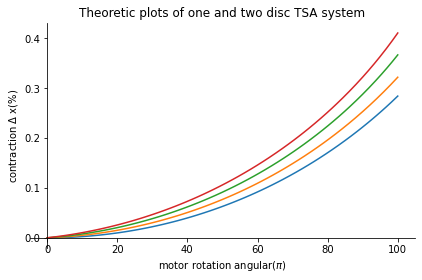

In [10]:
pct_x_nodisc=delta_x_nodisc/x
pct_x_one_disc=delta_x_one_disc/x
pct_x_two_disc=delta_x_two_disc/x
pct_x_three_disc=delta_x_three_disc/x


Line11,Line22,Line33,Line44=sp.plot(pct_x_nodisc,pct_x_one_disc,pct_x_two_disc,pct_x_three_disc,(theta,0,100),title='Theoretic plots of one and two disc TSA system',
       xlabel='motor rotation angular($\pi$)',ylabel='contraction $\Delta$ x(%)')
pct_x_zero,pct_y_zero=Line11.get_points()
pct_x_one,pct_y_one=Line22.get_points()
pct_x_two,pct_y_two=Line33.get_points()
pct_x_three,pct_y_three=Line44.get_points()


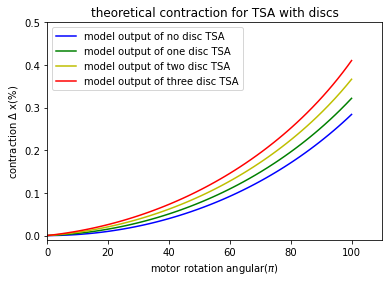

In [11]:
plt.plot(pct_x_zero,pct_y_zero,color='b',label='model output of no disc TSA')
plt.plot(pct_x_one,pct_y_one,color='g',label= 'model output of one disc TSA')
plt.plot(pct_x_two,pct_y_two,color='y',label='model output of two disc TSA')
plt.plot(pct_x_three,pct_y_three,color='r',label='model output of three disc TSA')
plt.legend()
plt.title('theoretical contraction for TSA with discs')
plt.xlabel('motor rotation angular($\pi$)')
plt.ylabel('contraction $\Delta$ x(%)')
plt.ylim((-0.01,0.5))
plt.xlim((0,110))
plt.show()

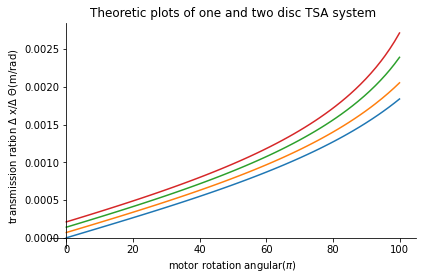

In [12]:
diff_x_nodisc=sp.diff(delta_x_nodisc)
diff_x_one_disc=sp.diff(delta_x_one_disc)
diff_x_two_disc=sp.diff(delta_x_two_disc)
diff_x_three_disc=sp.diff(delta_x_three_disc)

Line111,Line222,Line333,Line444=sp.plot(diff_x_nodisc,diff_x_one_disc,diff_x_two_disc,diff_x_three_disc,(theta,0,100),title='Theoretic plots of one and two disc TSA system',
       xlabel='motor rotation angular($\pi$)',ylabel='transmission ration $\Delta$ x/$\Delta$ $\Theta$(m/rad)')
pct_x_zero,pct_y_zero=Line111.get_points()
pct_x_one,pct_y_one=Line222.get_points()
pct_x_two,pct_y_two=Line333.get_points()
pct_x_three,pct_y_three=Line444.get_points()

# Following are experimental results

In [42]:
xls1_little = pd.ExcelFile('One_disc_little_1207.xlsx')
xls2_little = pd.ExcelFile('Two_disc_little_1207.xlsx')
xls2=pd.ExcelFile('2strings.xlsx')
xls3=pd.ExcelFile('Three_disc_1207.xlsx')


In [43]:
df_one_little=pd.read_excel(xls1_little, nrows=929)
print(df_one_little)

        0   0.1
0       4  0.01
1       9  0.03
2      12  0.03
3      15  0.01
4      18  0.03
..    ...   ...
924  1911  2.44
925  1913  2.44
926  1915  2.45
927  1915  2.45
928  1915  2.45

[929 rows x 2 columns]


In [44]:
df_two_little=pd.read_excel(xls2_little, nrows=963)
print(df_two_little)

        0   0.1
0       4  0.01
1       9  0.03
2      11  0.02
3      15  0.01
4      17  0.01
..    ...   ...
958  2285  2.09
959  2287  2.09
960  2289  2.09
961  2289  2.09
962  2289  2.09

[963 rows x 2 columns]


In [51]:
df2 = pd.read_excel(xls2, 'two_disc',nrows=1890)
df3 = pd.read_excel(xls3,nrows=896)
print(df2)
print(df3)

         0   0.1
0        3  0.02
1        4  0.02
2        7  0.02
3        9  0.02
4       10  0.02
...    ...   ...
1885  1727  2.97
1886  1727  2.97
1887  1729  2.98
1888  1729  2.98
1889  1729  2.98

[1890 rows x 2 columns]
        0   0.1
0       3  0.02
1       7  0.01
2      10  0.02
3      15  0.02
4      18  0.02
..    ...   ...
891  1781  3.34
892  1781  3.34
893  1783  3.34
894  1783  3.34
895  1783  3.34

[896 rows x 2 columns]


In [46]:
print(df_one_little)

        0   0.1
0       4  0.01
1       9  0.03
2      12  0.03
3      15  0.01
4      18  0.03
..    ...   ...
924  1911  2.44
925  1913  2.44
926  1915  2.45
927  1915  2.45
928  1915  2.45

[929 rows x 2 columns]


In [52]:
df_one_little.columns=["theta","delta_x"]
print(df2)
df2.columns=["theta","delta_x"]
df3.columns=["theta","delta_x"]
print(df2)

df_one_little["theta"]=df_one_little["theta"]*13/180
df2["theta"]=df2["theta"]*13/180
df3["theta"]=df3["theta"]*13/180

df_one_little["delta_x"]=df_one_little["delta_x"]/100
df2["delta_x"]=df2["delta_x"]/100
df3["delta_x"]=df3["delta_x"]/100

print(df2)



         0   0.1
0        3  0.02
1        4  0.02
2        7  0.02
3        9  0.02
4       10  0.02
...    ...   ...
1885  1727  2.97
1886  1727  2.97
1887  1729  2.98
1888  1729  2.98
1889  1729  2.98

[1890 rows x 2 columns]
      theta  delta_x
0         3     0.02
1         4     0.02
2         7     0.02
3         9     0.02
4        10     0.02
...     ...      ...
1885   1727     2.97
1886   1727     2.97
1887   1729     2.98
1888   1729     2.98
1889   1729     2.98

[1890 rows x 2 columns]
           theta  delta_x
0       0.216667   0.0002
1       0.288889   0.0002
2       0.505556   0.0002
3       0.650000   0.0002
4       0.722222   0.0002
...          ...      ...
1885  124.727778   0.0297
1886  124.727778   0.0297
1887  124.872222   0.0298
1888  124.872222   0.0298
1889  124.872222   0.0298

[1890 rows x 2 columns]


In [53]:
print(df_one_little)

        theta       delta_x
0    0.000109  1.000000e-10
1    0.000245  3.000000e-10
2    0.000326  3.000000e-10
3    0.000408  1.000000e-10
4    0.000490  3.000000e-10
..        ...           ...
924  0.051993  2.440000e-08
925  0.052047  2.440000e-08
926  0.052102  2.450000e-08
927  0.052102  2.450000e-08
928  0.052102  2.450000e-08

[929 rows x 2 columns]


[0.00150686 0.00339043 0.00452058 0.00565072 0.00678086 0.00791101
 0.00941787 0.00979458 0.01092473 0.01167816 0.01243158 0.01356173
 0.01469187 0.0154453  0.01657545 0.01770559 0.01883573 0.01996588
 0.02147274 0.02260288 0.02373302 0.02486317 0.02599331 0.02712346
 0.0282536  0.02938374 0.03051389 0.03164403 0.03239746 0.03352761
 0.03390432 0.03503447 0.03578789 0.03616461 0.03729475 0.0384249
 0.03955504 0.04068519 0.04181533 0.04294547 0.0436989  0.04482905
 0.04595919 0.04708933 0.04821948 0.04934962 0.05010305 0.0512332
 0.05236334 0.05349348 0.05462363 0.05575377 0.05613049 0.05688392
 0.05839078 0.05876749 0.05952092 0.06065106 0.06178121 0.06291135
 0.0640415  0.06517164 0.06630178 0.06743193 0.06856207 0.06969222
 0.07082236 0.07119907 0.07232922 0.07345936 0.07458951 0.07534294
 0.07647308 0.07722651 0.07873337 0.0794868  0.08024023 0.08174709
 0.0821238  0.08325394 0.08400737 0.08513752 0.08626766 0.08664438
 0.08777452 0.08890466 0.09003481 0.09116495 0.0922951  0.093048

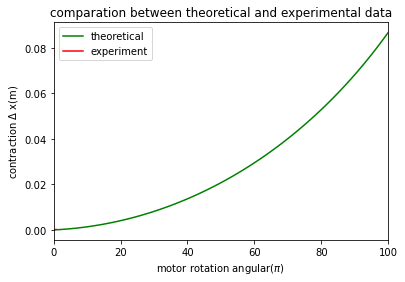

In [39]:
x_1=np.array(df_one_little["theta"])
print(x_1)
y_1=np.array(df_one_little["delta_x"])
plt.plot(x_one,y_one,color='g',label= 'theoretical')
plt.plot(x_1,y_1,color='r',label='experiment')
plt.legend()
plt.title('comparation between theoretical and experimental data')
plt.xlabel('motor rotation angular($\pi$)')
plt.ylabel('contraction $\Delta$ x(m)')

plt.xlim((0,100))
plt.show()